In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [3]:
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict

In [4]:
import warnings
warnings.filterwarnings('ignore')

# New Section

In [6]:
#loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('/car data.csv')

In [12]:
#inspecting the first 5 rows of the dataframe
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# New Section

In [ ]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [13]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [14]:
print("Number of Rows", car_dataset.shape[0])
print("Number of columns", car_dataset.shape[1])

Number of Rows 301
Number of columns 9


In [15]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [16]:
# checking the number of missing values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [18]:
# Data preprocessing
import datetime

In [19]:
date_time = datetime.datetime.now()

In [20]:
date_time.year

2023

In [21]:
car_dataset['Age'] = date_time.year-car_dataset['Year']

In [22]:
date_time.year-car_dataset['Year']

0       9
1      10
2       6
3      12
4       9
       ..
296     7
297     8
298    14
299     6
300     7
Name: Year, Length: 301, dtype: int64

In [23]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


<Axes: >

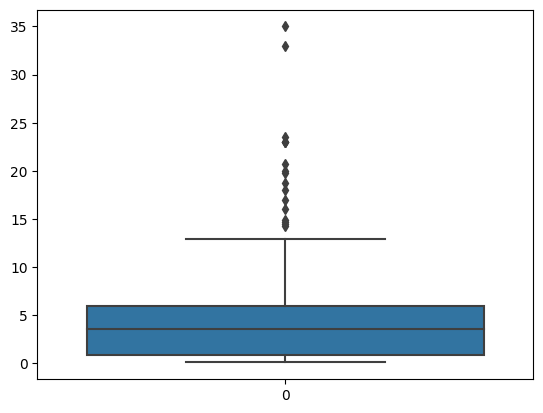

In [24]:
sns.boxplot(car_dataset['Selling_Price'])

Encoding the categorical columns

In [25]:
car_dataset.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10


In [26]:
car_dataset['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [27]:
car_dataset['Fuel_Type']=car_dataset['Fuel_Type'].map({'Petrol':0, 'Diesel':1, 'CNG':2})

In [28]:
car_dataset['Fuel_Type'].unique()

array([0, 1, 2])

In [29]:
car_dataset['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [30]:
car_dataset['Seller_Type'] = car_dataset['Seller_Type'].map({'Dealer':0, 'Individual':1})

In [31]:

car_dataset['Seller_Type'].unique()

array([0, 1])

In [32]:
car_dataset['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [33]:
car_dataset['Transmission'] = car_dataset['Transmission'].map({'Manual':0, 'Automatic':1})

In [34]:
car_dataset['Transmission'].unique()

array([0, 1])

In [35]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,9
1,sx4,2013,4.75,9.54,43000,1,0,0,0,10
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,6
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,12
4,swift,2014,4.60,6.87,42450,1,0,0,0,9


In [36]:
# checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


# Encoding the Categorical data

Splitting the data and target

In [37]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [39]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  Age  
0        0    9  
1        0   10  
2        

In [38]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test data

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state=2)

Linear Regression

In [41]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

lf = RandomForestRegressor()
lf.fit(X_train, Y_train)

xgb = GradientBoostingRegressor()
xgb.fit(X_train, Y_train)

xg = XGBRegressor()
xg.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
y_pred1 = lin_reg_model.predict(X_test)
y_pred2 = lf.predict(X_test)
y_pred3 = xgb.predict(X_test)
y_perd4 = xg.predict(X_test)

Model Evaluation

In [43]:
score1 = metrics.r2_score(Y_test, y_pred1)
score2 = metrics.r2_score(Y_test, y_pred2)
score3 = metrics.r2_score(Y_test, y_pred3)
score4 = metrics.r2_score(Y_test, y_pred3)

In [44]:
print(score1, score2, score3, score4)

0.8365766715024981 0.9821527597721862 0.9805843672110088 0.9805843672110088


In [45]:
final_car_dataset = pd.DataFrame({'Models':['LR', 'LF', 'GBR', 'XG'],
                                  "R2_score":[score1, score2, score3, score4]})

In [46]:
final_car_dataset

,Models,R2_score
0,LR,0.836577
1,LF,0.982153
2,GBR,0.980584
3,XG,0.980584


In [48]:
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1,}}, inplace=True)

car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1,}}, inplace=True)

In [49]:
training_data_prediction = lin_reg_model.predict(X_train)

In [50]:
test_data_prediction = lin_reg_model.predict(X_test)

In [51]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.8799451660493701


Visualize the actual prices and Predicted prices

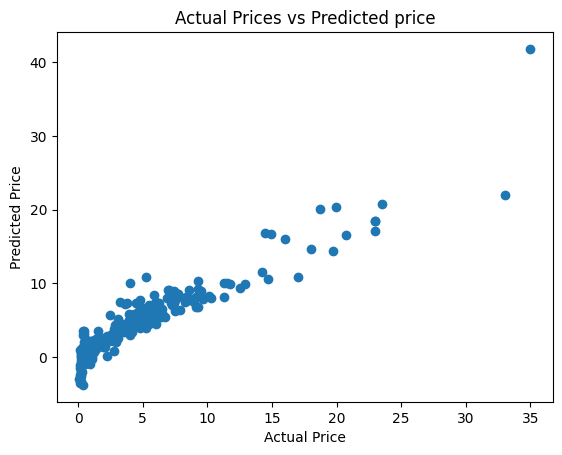

In [53]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted price")
plt.show()

In [54]:
test_data_prediction = lin_reg_model.predict(X_test)

In [55]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error: ", error_score)

R squared Error:  0.8365766715024981


Text(0.5, 1.0, 'Actual Price vs Predicted Prices')

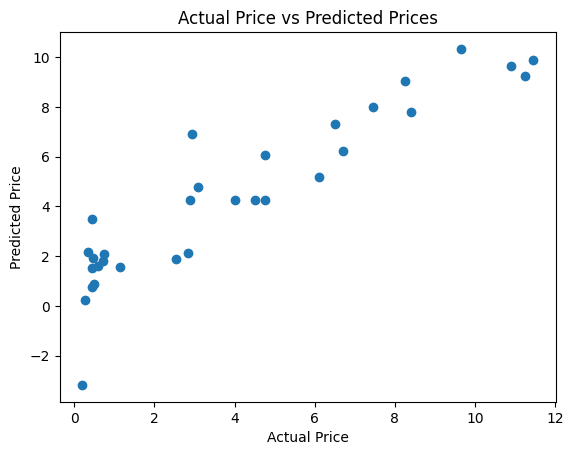

In [56]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")

Lasso Regression

In [57]:
lass_reg_model = Lasso()

In [58]:
lass_reg_model.fit(X_train, Y_train)


Lasso()

In [59]:
training_data_prediction = lass_reg_model.predict(X_train)

In [60]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8427865885661434


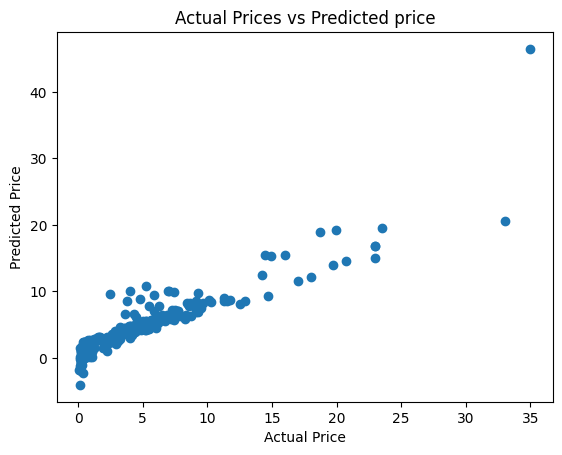

In [61]:

plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted price")
plt.show()

In [62]:
test_data_prediction = lass_reg_model.predict(X_test)

In [63]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error :", error_score)

R squared Error : 0.8709151375567289


Text(0.5, 1.0, 'Actual Price vs Predicted Prices')

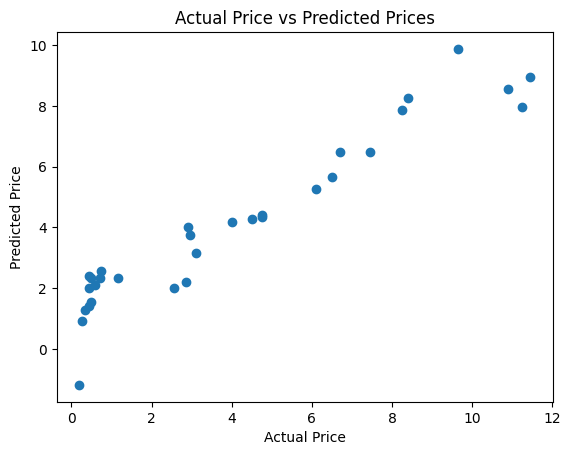

In [64]:

plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Prices")

In [65]:
def crossValEvaluate(model, X, y):
  y_pred = cross_val_predict(model, X, y, cv=3);

  scores = mean_squared_error(y_pred, y)
  print(f'Validation Error: {np.sqrt(scores)}')

In [66]:
def testSetEvaluate(model, X_train, y_train, X_test, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  scores = mean_squared_error(y_pred, y_test)
  print(f'Test Error: {np.sqrt(scores)}')

  return scores

In [67]:
lin_reg_model.coef_ , lin_reg_model.intercept_

(array([ 2.04713063e-01,  4.38728846e-01, -6.73100388e-06,  1.76308349e+00,
        -1.00417660e+00,  1.50736348e+00, -8.74133473e-01, -2.04713063e-01]),
 -408.8814353441861)

In [69]:
acc = []
model = []
err = []

In [70]:
model.append('Decision Tree')

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state=2)

In [78]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8, min_samples_leaf=5)
dt.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=5)

In [79]:
dt_score = dt.score(X_test,Y_test)
acc.append(dt_score)
print('Decision Tree Accuracy = ', dt_score*100 , '%')

Decision Tree Accuracy =  92.8757812628686 %


In [83]:
crossValEvaluate(dt, X_train, Y_train)

Validation Error: 2.227718626045131


In [84]:
dt_error = testSetEvaluate(dt, X_train, Y_train, X_test, Y_test)
err.append(dt_error)

Test Error: 0.9681528940586758


In [85]:
y_pred_dt = dt.predict(X_test)

In [86]:
pred_df_dt = pd.DataFrame({'Test_Value':Y_test, 'Predicted':y_pred_dt})
pred_df_dt.sample(20)

,Test_Value,Predicted
237,11.25,9.505556
29,7.45,7.100000
178,0.35,0.253750
130,0.75,0.622000
183,0.27,0.253750
269,6.70,7.100000
282,8.25,9.505556
290,4.50,4.983333
161,0.45,0.616000
30,3.10,3.993750


In [87]:
model.append('Random Forest')

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=10, min_samples_leaf=10,n_estimators=30)
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=10, n_estimators=30)

In [90]:
rf_score = rf.score(X_test,Y_test)
acc.append(rf_score)
print('Random Forest Accuracy : ',rf_score*100, '%')

Random Forest Accuracy :  93.63266790965783 %


In [92]:
crossValEvaluate(rf, X_train, Y_train)

Validation Error: 2.600942570098499


In [94]:
rf_error = testSetEvaluate(rf, X_train, Y_train, X_test, Y_test)
err.append(rf_error)

Test Error: 0.7912330938687913


In [95]:
y_pred_rf = rf.predict(X_test)
     

In [96]:
pred_df_rf = pd.DataFrame({'Test_Value':Y_test,'Predicted':y_pred_rf})
pred_df_rf.sample(20)
     

,Test_Value,Predicted
30,3.10,3.971960
99,9.65,11.835613
192,0.20,0.270168
156,0.48,0.421555
35,2.95,3.508605
275,10.90,10.265487
7,6.50,6.868118
154,0.50,0.605534
164,0.45,0.421555
29,7.45,7.815121


THANK YOU